### Link de Material Complementario
https://1drv.ms/f/s!Anh5cvrOJtUTk947pH1XrDYR6wgQcw?e=iQtQzS

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Modulo 5.- Pandas 6

## 6.1. Groupby
Como hemos visto, es muy fácil hacer estadísticas sobre  columnas de un dataframe. Pero muchas veces estamos  interesados en realizar estadísticas a subconjuntos de  esos datos según la categoría a la que pertenezcan. Por  ejemplo, encontrar el promedio de edad para hombres y  mujeres, o para hombres y mujeres divididos también por  la clase en la que viajaban.

Para este tipo de operaciones existe el método groupby,  que permite hacer los agrupamientos de una forma  eﬁciente y sencilla. Este método crea una estructura de  datos particular a la que le podemos aplicar diferentes  operaciones estadísticas.      
**Sólo cuando aplicamos estas  operaciones se devuelve un dataframe con la información.**

In [3]:
data.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


Si la operación a realizar solamente admite números, se aplica a las  columnas numéricas exclusivamente.

In [4]:
data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [5]:
# promedio de edad segun sexo
data[['Age', 'Sex']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


In [6]:
data[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean()

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

# Modulo 5.- Pandas 7

## 7.1. Gráficos
Pandas ofrece muchas facilidades para hacer gráﬁcos de  manera sencilla. Se basa en Matplotlib, el principal  módulo de gráﬁcos de Python, que estudiaremos la  próxima clase, para realizar los gráﬁcos.

Podemos acceder a las funcionalidades para graﬁcar a  través del método plot. Permite acceder a distintos tipos  de gráﬁcos de forma sencilla. Por ejemplo, se pueden  hacer histogramas con plot.hist(), gráﬁcos de barras  con plt.bar, y de torta con plt.pie().

### 7.1.1. Histogramas
Un histograma es una representación  de la distribución de un conjunto de  números. El rango se divide en barras  y la altura de la barra es proporcional a  la cantidad de datos que entran en el  rango de la barra (ancho). Se puede  deﬁnir la cantidad de barras a mostrar.

<AxesSubplot:ylabel='Frequency'>

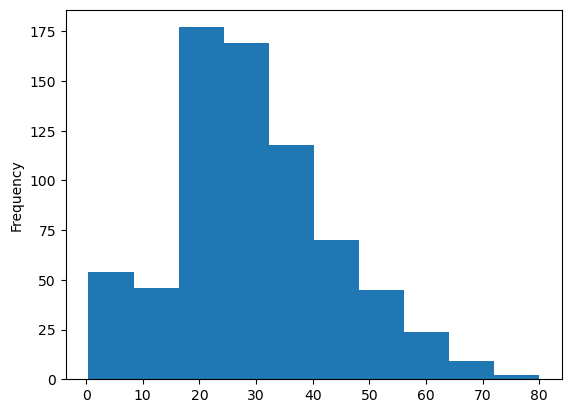

In [7]:
data['Age'].plot.hist()

Los métodos vienen con algunos parámetros para controlar el  aspecto del gráﬁco.

<AxesSubplot:title={'center':'Distribucion de edades'}, ylabel='Frequency'>

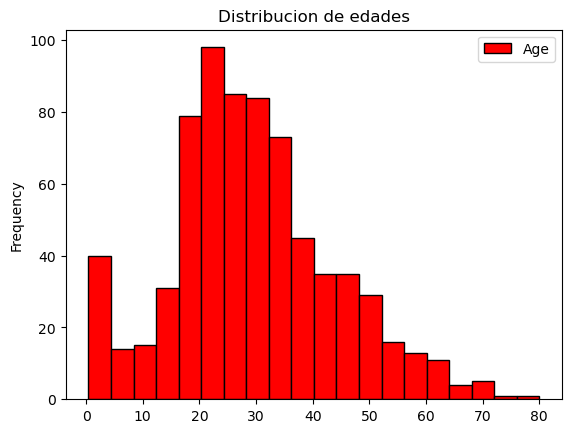

In [8]:
data['Age'].plot.hist(bins = 20, title = 'Distribucion de edades', legend = True, color = 'red', edgecolor = 'black')

### 7.1.2. Gráfico de Barras
Este tipo de gráﬁcos muestra barras de altura variable. En general, son útiles para  mostrar estadísticas tomadas por categorías por medio de groupby.

<AxesSubplot:xlabel='Sex'>

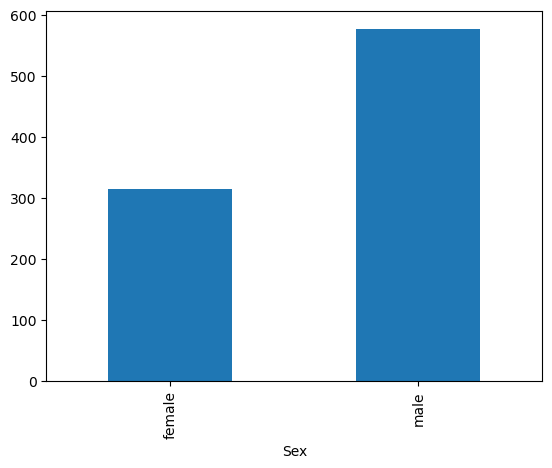

In [9]:
data.groupby('Sex').size().plot.bar()

<AxesSubplot:xlabel='Sex'>

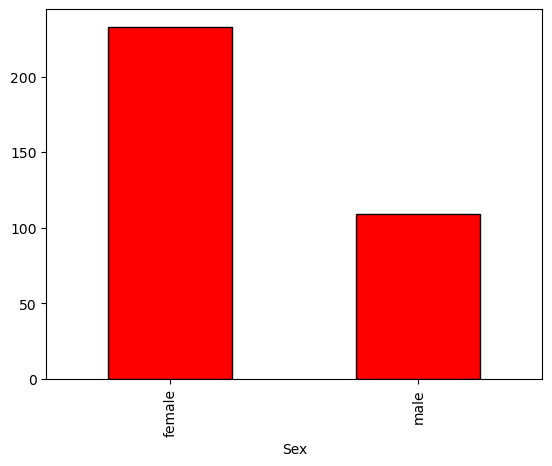

In [10]:
data.groupby('Sex')['Survived'].sum().plot.bar(color = 'red', edgecolor = 'black' )

### 7.1.3. Gráfico de Torta
Otra forma de representar  este tipo de información  es el gráﬁco de tortas,  donde el área de la cuña  es proporcional al número  que representa.

<AxesSubplot:title={'center':'Proporcion de hombres y mujeres'}, ylabel='None'>

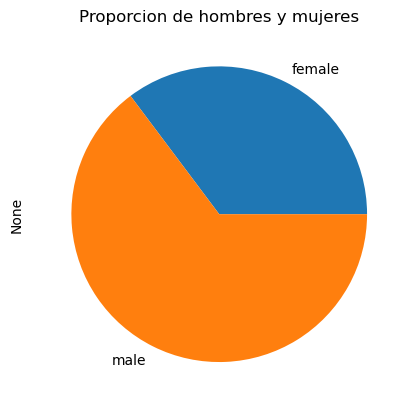

In [11]:
data.groupby('Sex').size().plot.pie(title = 'Proporcion de hombres y mujeres')

### 7.1.3. Gráfico de Lineas
Si los datos están ordenados se puede usar plot  para representarlos sobre una línea en donde el  eje x es el índice de la serie y el eje y es el valor.

Si este método se aplica sobre un dataframe, las  columnas numéricas se muestran en el mismo  gráﬁco compartiendo el eje x. A continuación  creamos un dataset para practicar.

### Ejemplo metodo cumsum(axis = 0)

In [12]:
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

print(df)

   A  B
0  1  4
1  2  5
2  3  6


In [13]:
cumulative_sum = df.cumsum(axis=0)
print(cumulative_sum)

   A   B
0  1   4
1  3   9
2  6  15


In [14]:
arr = np.random.randn(1000,4).cumsum(axis = 0)
arr

array([[  1.0783927 ,  -0.37319064,   1.60014418,  -0.50047376],
       [  3.13067388,   0.30966284,   2.15370397,  -0.48680447],
       [  2.61504809,  -0.89801415,   1.6741593 ,  -0.34890828],
       ...,
       [ 57.73574852,  39.22643418, -18.86316603, -10.994788  ],
       [ 56.19633026,  40.25133807, -19.48531995, -12.75792406],
       [ 57.75985906,  40.56670786, -20.07758275, -13.27453605]])

In [15]:
df = pd.DataFrame(arr, columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,1.078393,-0.373191,1.600144,-0.500474
1,3.130674,0.309663,2.153704,-0.486804
2,2.615048,-0.898014,1.674159,-0.348908
3,1.466041,-1.132327,1.932099,-0.544221
4,2.122844,-0.733667,2.381256,-0.553193
...,...,...,...,...
995,58.112197,36.968652,-18.027673,-8.612001
996,58.756146,38.725636,-16.611360,-9.425671
997,57.735749,39.226434,-18.863166,-10.994788
998,56.196330,40.251338,-19.485320,-12.757924


<AxesSubplot:>

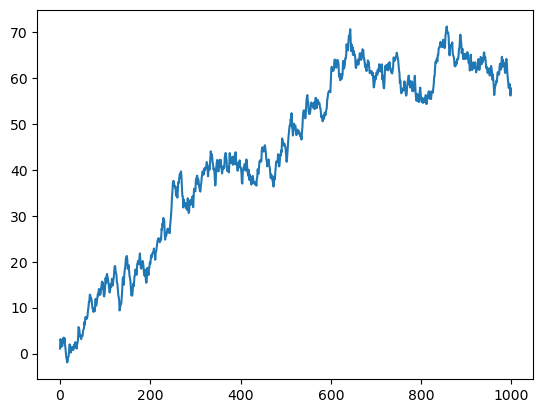

In [16]:
df['A'].plot()

<AxesSubplot:>

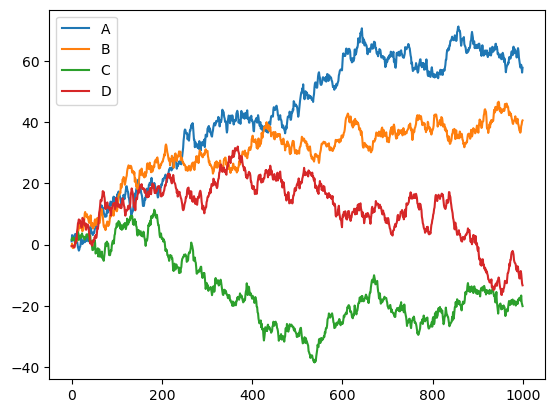

In [17]:
df.plot()

# Modulo 5.- Pandas 8

## 8.1. Missing values
Tener un dataset con missing values es un caso muy  común a la hora de trabajar con datos. Puede suceder  que algunos datos se hayan perdido, por lo que no  estén disponibles, o que no se hayan recolectado  correctamente. Incluso puede suceder que la  información jamás haya existido.

Existen varias técnicas a la hora de trabajar con  missing values y pandas ofrece funcionalidades para  manipularlos.

Para representar missing values pandas usa  principalmente el valor np.nan (NaN: Not a  Number). Este es un valor especial dentro de  los números ﬂotantes.

In [18]:
df = pd.DataFrame({'A': [1, 3, 5, 4, 2], 'B': [8, 2, np.nan, 1, 5]})
df

,A,B
0,1,8.0
1,3,2.0
2,5,NaN
3,4,1.0
4,2,5.0


In [19]:
df['A'] + df['B']

0    9.0
1    5.0
2    NaN
3    5.0
4    7.0
dtype: float64

A su vez, las funciones de agregación también permiten controlar cómo se trata NaN. Por defecto son ignorados, pero se puede controlar con el parámetro skipna.

In [20]:
df.mean()

A    3.0
B    4.0
dtype: float64

In [21]:
df.mean(skipna = False)

A    3.0
B    NaN
dtype: float64

## 10.1. Fechas
Para representar fechas y horas se utiliza un tipo  de dato especial: **datetime64**. Y para representar  intervalos de tiempo su usa **timedelta64**.       
Son  tipos de datos que incorporan características y  operaciones propias de trabajar y medir tiempos.

Usualmente cuando leemos un archivo las fechas  se representan como strings. Para convertirlo a  datetime64 se usa la función  pd.to_datetime,  que permite controlar el formato con el que se va a  leer la información, que puede venir de diferentes  formas:**yyyy-mm-dd, dd/mm/yy, Month dd,  yyyy, etc.**

In [22]:
gold = pd.read_csv('GoldPrice.csv')
gold

,Date,Price,Open,High,Low
0,"Aug 01, 2018",1216.6,1223.40,1223.4,1216.20
1,"Jul 31, 2018",1223.7,1220.40,1228.1,1213.00
2,"Jul 30, 2018",1221.3,1222.50,1223.9,1218.10
3,"Jul 27, 2018",1222.2,1223.50,1226.8,1216.70
4,"Jul 26, 2018",1225.3,1227.80,1227.8,1227.80
...,...,...,...,...,...
9766,"Jan 03, 1980",625.0,627.00,640.0,603.00
9767,"Jan 02, 1980",575.5,562.50,577.0,558.00
9768,"Dec 31, 1979",533.6,527.88,534.5,527.88
9769,"Dec 28, 1979",517.8,516.00,517.8,510.40


In [23]:
gold.dtypes

Date      object
Price    float64
Open     float64
High     float64
Low      float64
dtype: object

In [24]:
gold['Date']=pd.to_datetime(gold['Date'])
gold

,Date,Price,Open,High,Low
0,2018-08-01,1216.6,1223.40,1223.4,1216.20
1,2018-07-31,1223.7,1220.40,1228.1,1213.00
2,2018-07-30,1221.3,1222.50,1223.9,1218.10
3,2018-07-27,1222.2,1223.50,1226.8,1216.70
4,2018-07-26,1225.3,1227.80,1227.8,1227.80
...,...,...,...,...,...
9766,1980-01-03,625.0,627.00,640.0,603.00
9767,1980-01-02,575.5,562.50,577.0,558.00
9768,1979-12-31,533.6,527.88,534.5,527.88
9769,1979-12-28,517.8,516.00,517.8,510.40


Los objetos de tipo datetime tienen varios atributos, como **year,  month, day, hour**. Para acceder a los atributos y métodos  propios del tipo de dato datetime se utiliza el atributo dt.

In [25]:
gold['Date'].dt.year

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
9766    1980
9767    1980
9768    1979
9769    1979
9770    1979
Name: Date, Length: 9771, dtype: int64

In [26]:
gold['Date'].dt.month

0        8
1        7
2        7
3        7
4        7
        ..
9766     1
9767     1
9768    12
9769    12
9770    12
Name: Date, Length: 9771, dtype: int64

In [27]:
gold.set_index('Date', inplace = True)
gold

,Price,Open,High,Low
Date,,,,
2018-08-01,1216.6,1223.40,1223.4,1216.20
2018-07-31,1223.7,1220.40,1228.1,1213.00
2018-07-30,1221.3,1222.50,1223.9,1218.10
2018-07-27,1222.2,1223.50,1226.8,1216.70
2018-07-26,1225.3,1227.80,1227.8,1227.80
...,...,...,...,...
1980-01-03,625.0,627.00,640.0,603.00
1980-01-02,575.5,562.50,577.0,558.00
1979-12-31,533.6,527.88,534.5,527.88


In [28]:
# seleccionar el año 2016
gold.loc['2016']

,Price,Open,High,Low
Date,,,,
2016-12-30,1150.00,1162.0,1162.00,1151.0
2016-12-29,1156.40,1143.8,1158.80,1143.6
2016-12-28,1139.40,1141.2,1141.20,1138.0
2016-12-27,1137.30,1134.3,1142.20,1134.3
2016-12-26,1134.55,1135.0,1136.05,1134.0
...,...,...,...,...
2016-01-08,1097.80,1111.1,1111.10,1093.0
2016-01-07,1107.70,1091.6,1109.40,1091.6
2016-01-06,1091.90,1081.6,1093.70,1081.6


# Modulo 6.- Matplotlib 1

## 1.1. Visualización de datos
La **visualización de datos** es la representación de  los datos a través de gráﬁcos de distinto tipo.      
Es un  tipo de representación mucho más fácil de entender  para una persona que otras formas de representar  información, como las tablas, más aún cuando la  cantidad de datos es grande.
Las representaciones visuales permiten descubrir y  comunicar relaciones complejas entre los datos y son  una herramienta importante del análisis de datos  moderno.

**Matplotlib** es un módulo de bajo nivel para  visualización de datos. Está hecho sobre Numpy,  por lo que es ideal para hacer gráﬁcos a partir  de datos alojados en arrays. Por esta razón se  integra perfectamente al ecosistema de  módulos de Python.
Se dice que es de bajo nivel porque permite  controlar cualquier aspecto de un gráﬁco, ya que  tiene numerosas funciones para conﬁgurar  cualquier cosa que uno quiera. Por esto mismo  sirve de base a otros módulos (de alto nivel) que  están construidos sobre Matplotlib, como  Seaborn o Cartopy.

In [29]:
import matplotlib.pyplot as plt

La función **plot** es una de las funciones básicas y sirve  para graﬁcar puntos en 2d y unirlos con líneas (por  defecto una línea continua azul). Recibe como  parámetros dos arrays, uno para las coordenadas x y  otro para las coordenadas y de los datos.
En caso de que se provea un solo array, este se usa  como coordenadas **y** mientras que las coordenadas x se  defaultean a números enteros empezando por cero.

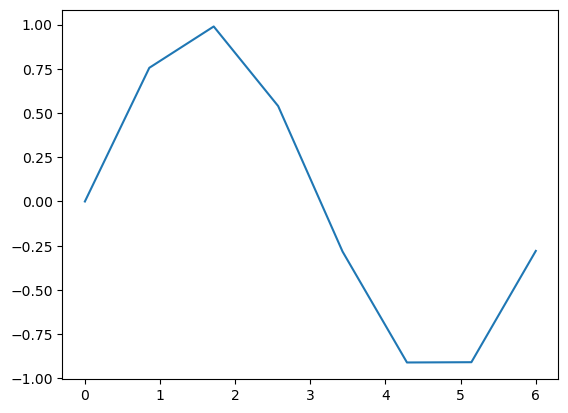

In [30]:
N = 8
x = np.linspace(0,6,N)
y = np.sin(x)
plt.plot(x, y)

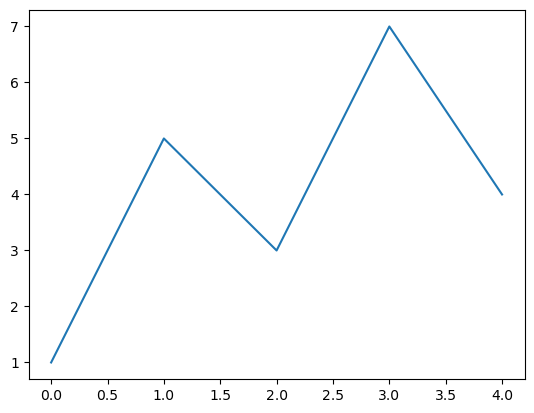

In [31]:
plt.plot([1,5,3,7,4])

# Modulo 6.- Matplotlib 2

## 2.1. Format String
Adicionalmente a los datos, a la función plot se le puede  pasar un string para controlar algunos aspectos básicos  del gráﬁco de forma rápida y sencilla. Este format string  puede contener información para controlar tres aspectos:
- Marcador: controla el tipo de marca que se usa para  señalar los datos, como por ejemplo si los vamos a  marcar con círculos, cuadrados, triángulos, puntos,  estrellas, etc.
- Línea: el tipo de línea a utilizar para unir los puntos:  continua, punteada, rayada, raya-punto o ninguna.
- Color: algunos colores básicos que podemos usar para  el conjunto de datos

### 2.2.1. Marcador
Cada opción tiene un carácter que lo representa y puede estar presente o no en el format string.  Las opciones para el marcador son:
![imagen](marcadores.png)

### 2.2.2. Linea y Color
Los caracteres para el tipo de línea y para el color se muestran a continuación.  Si el carácter de la línea se omite, solo graﬁcará los puntos.
![imagen](lineas.png)

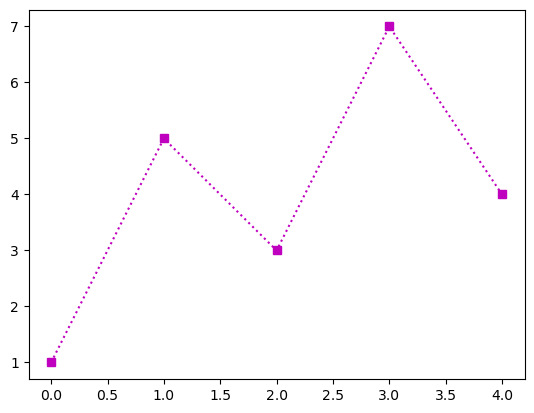

In [32]:
plt.plot([1,5,3,7,4], 's:m')

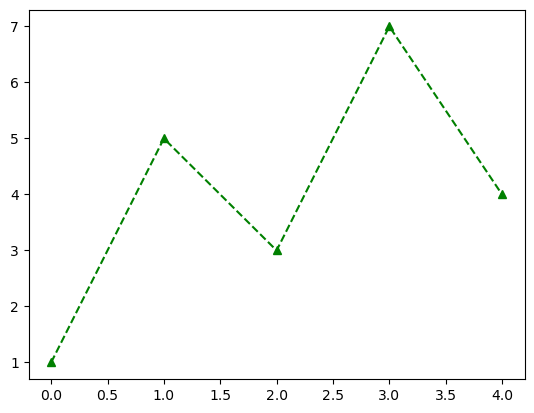

In [33]:
plt.plot([1,5,3,7,4], '^--g')